In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from src.config import PATHS

style_sheet = PATHS.MISC_DIR / "base.mplstyle"
plt.style.use(style_sheet)

# display option to 30 columns
pd.set_option("display.max_columns", 30)

%matplotlib inline

### Importing data

In [3]:
data_file_path = PATHS.DATA_DIR / "sample_data.csv"
step_counter_readings = pd.read_csv(data_file_path)
step_counter_readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  200 non-null    float64
 1   gyro_x     200 non-null    float64
 2   gyro_y     200 non-null    float64
 3   gyro_z     200 non-null    float64
 4   accel_x    200 non-null    float64
 5   accel_y    200 non-null    float64
 6   accel_z    200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


### Preliminary view of data

In [4]:
step_counter_readings.head()

,timestamp,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z
0,1.676119e+09,15.264663,84.768130,-7.000531,-48.712918,-52.266628,27.931961
1,1.676119e+09,78.950055,6.629423,-47.109141,-68.040712,40.696921,25.718494
2,1.676119e+09,-4.692142,14.869784,-1.113065,-24.219097,-67.011416,-33.324006
3,1.676119e+09,31.914051,-120.623093,9.327499,81.176644,11.311141,-65.243876
4,1.676119e+09,70.151789,21.277747,50.237553,-52.572389,38.633531,-24.521147


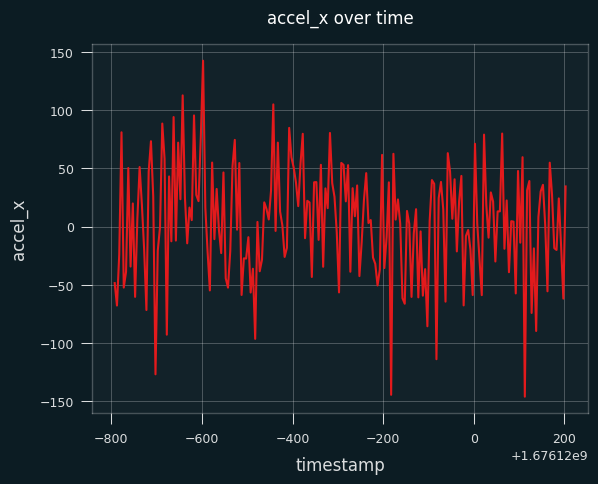

In [7]:
# example of time series data
sns.lineplot(data=step_counter_readings, x="timestamp", y="accel_x")
plt.title(label="accel_x over time")
plt.show() 

### Calculate the acceleration magnitude

In [38]:
def calculate_magnitude(*vectors: pd.Series) -> pd.Series: 
    sum_of_squares = np.sum([vector ** 2 for vector in vectors], axis=0)
    return np.sqrt(sum_of_squares)

In [44]:
step_counter_readings["accel_magnitude"] = calculate_magnitude(
    step_counter_readings["accel_x"], step_counter_readings["accel_y"], step_counter_readings["accel_z"]
)

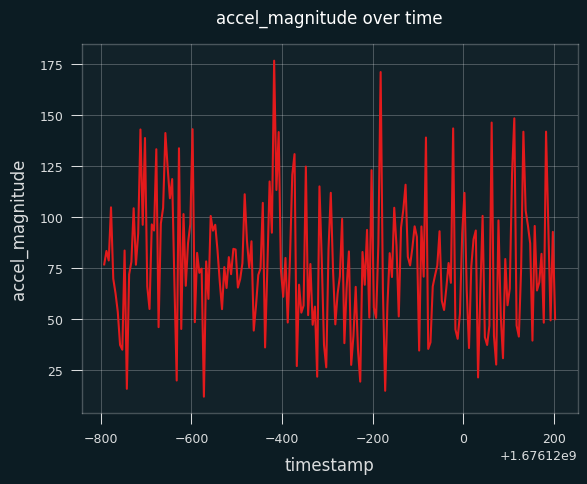

In [45]:
# example of time series data
sns.lineplot(data=step_counter_readings, x="timestamp", y="accel_magnitude")
plt.title(label="accel_magnitude over time")
plt.show() 

### Calculate average intervals over time  

In [48]:
step_counter_readings["time_interval"] = step_counter_readings["timestamp"] // 30 # this figure will change based on resulting data

In [56]:
# calculate average and std magnitude over time  
half_minute_intervals = step_counter_readings.groupby(["time_interval"])["accel_magnitude"].agg([np.mean, np.std])
half_minute_intervals.head()

,mean,std
time_interval,,
67044768.0,85.870776,12.896228
67044769.0,51.514358,15.328525
67044770.0,70.650937,33.102307
67044771.0,109.289930,29.814879
67044772.0,88.753766,30.568994


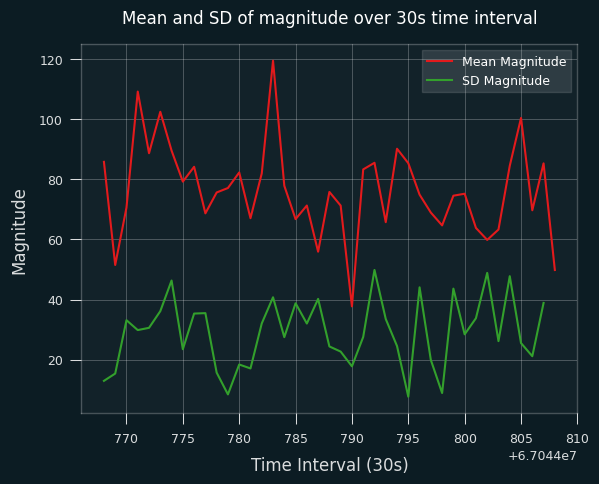

In [64]:
# example of time series data
sns.lineplot(data=half_minute_intervals, x="time_interval", y="mean", label="Mean Magnitude")
sns.lineplot(data=half_minute_intervals, x="time_interval", y="std", label="SD Magnitude")

plt.title(label="Mean and SD of magnitude over 30s time interval")
plt.xlabel("Time Interval (30s)")
plt.ylabel("Magnitude")
plt.legend(loc="upper right")
plt.show() 